# Intégration numérique

Objectifs :
<br>
    - Implémentation des méthodes des rectangle, trapèzes, et de Simpson.
    <br>
    - Estimation de leur vitesse de convergence.
    <br>
    - Utilisation des routines du module integrate de Scipy.
    <br>
    - Complément : implémentation de la méthode de Monte Carlo.

## Méthode des rectangles

<div id="exer:integration-rectangles"></div>

La méthode des rectangles est basée sur la définition de l'intégrale au sens de Riemann. On divise l'intervalle $[a,b]$ avec $n+1$ points équirépartis $(x_i)_{0\leq i\leq n}$ définis par $x_i=a+\frac{i(b-a)}{n}$ et espacés de la même distance $\frac{b-a}{n}$. Ensuite, on approche $f$ par une fonction $f_n$ constante sur chaque intervale $(x_i,x_{i+1})$.

### Méthode des rectangles à gauche

En choisissant des rectangles à gauche:
$$
f_n(x)=f(x_i) \qquad \mbox{pour tous }x\in [x_i,x_{i+1}),
$$
l'intégrale $\int_a^b f(x)dx$ est approchée par:
$$
J_n=\int_a^b f_n(x)dx= \frac{b-a)}{n} \sum_{i=0}^{n-1} f(x_i) 
$$

__Lemme__ : Si $f\in C^1([a,b])$ alors il existe $C>0$ tel que pour tout $n\geq 1$:
$$
\left|\int_a^b f(x)dx-J_n\right| \leq \frac{C}{n}
$$
__Preuve__ : Soit $x\in [a,b)$, et soit $i$ l'entier tel que $x_i\leq x<x_{i+1}$. On a alors:
\begin{align*}
|f(x)-f_n(x)| &=|f(x)-f(x_i)| \\
&=|\int_{x_i}^{x} f'(x)dx| \\
& \leq \| f'\|_{L^\infty([a,b])} |x_i-x| \\
&\leq \| f'\|_{L^\infty([a,b])} \frac{b-a}{n}.
\end{align*}
On en déduit que
$$
\| f_n-f\|_{L^\infty([a,b])} \leq  \| f'\|_{L^\infty([a,b])} \frac{b-a}{n}.
$$
Et donc:
$$
\left|\int_a^b f(x)dx-J_n\right| = \left| \int_a^b (f(x)-f_n(x))dx \right| \\
\leq \| f_n-f\|_{L^\infty([a,b])} (b-a) \\
\leq   \frac{(b-a)^2 \| f'\|_{L^\infty([a,b])}}{n}.
$$
Cela conclut la preuve du lemme.

On dit qu'une méthode est d'ordre $\alpha$ si l'erreur dans l'approximation numérique est de taille $n^{-\alpha}$ sous des hypothèses raisonnables sur la fonction. La méthode des rectangles est donc d'ordre 1.

La fonction suivante `rectangle(f,a,b,n)` donne une approximation de $\int_a^bf(x)dx$ par la méthode des rectangle à gauche avec $n+1$ points :

In [6]:
import numpy as np
def rectangle(f,a,b,n):
    x=np.linspace(a,b,n,endpoint=False) # la mention endpoint=False permet de ne pas inclure le point b
    y=f(x)
    return(np.sum(y)*(b-a)/n)
    

Pour calculer l'intégrale 
$$
\int_0^1 \frac{dx}{1+x^2}
$$
par la méthode des rectangles à gauche, on commence par définir la fonction $f$:

In [7]:
def fonctiontest(x):
    return(1/(1+x**2))

Puis on calcule

In [8]:
rectangle(fonctiontest,0,1,100)

0.7878939967307823

La fonction `plot_rectangles(f,a,b,n)` suivante représente graphiquement l'approximation par la méthode des rectangles à gauche.

In [9]:
from matplotlib import pyplot as plt
def plot_rectangles(f,a,b,n):
    N=100*n
    x=np.linspace(a,b,N,endpoint=False) # la mention endpoint=False permet de ne pas inclure le point b
    y=f(x)
    z=np.zeros([N])
    for i in range(n):
        for j in range(100):
            z[i*100+j]=y[i*100]
    plt.plot(x,y,label="original")
    plt.plot(x,z,label="rectangles a gauche")
    plt.legend()
    plt.show()

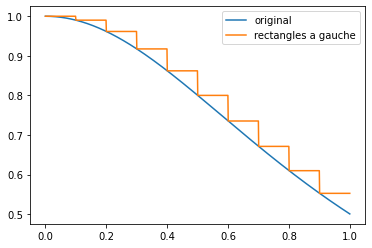

In [10]:
plot_rectangles(fonctiontest,0,1,10)

Pour représenter la vitesse de convergence de la méthode de rectangles à gauche pour approcher $\int_0^1 \frac{dx}{1+x^2}$, puisqu'on sait que cette intégrale est égale à $\frac{\pi}{4}$ (en reconnaissant la dérivée de la fonction arctangente), on définit l'erreur:
$$
e_n=|\frac \pi 4-J_n|.
$$
Le code suivant représente la suite des erreurs $(e_n)_{n\in \mathbb N}$ avec des échelles logarithmiques pour les valeurs de cette suite et pour les valeurs de $n$.

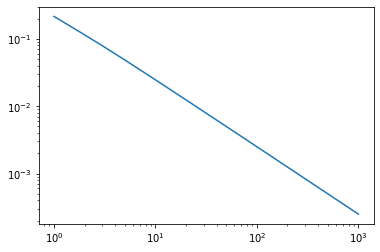

In [11]:
%matplotlib inline
x=np.array([n+1 for n in range(1000)])
y=np.array([abs(rectangle(fonctiontest,0,1,n+1)-np.pi/4) for n in range(1000)])
plt.loglog(x,y)

On constate que la courbe est asymptotiquement une droite de pente négative pour $n$ grand, c'est-à-dire que $\log(e_n)\sim c-\alpha \log(n)$ ou encore que $e_n\sim C n^{-\alpha}$ pour $C=e^c$. Cela veut dire que la vitesse de convergence est polynomiale. De plus, on voit graphiquement que $\alpha=1$, c'est à dire que $e_n\sim C n^{-1}$ ce qui illustre bien le fait que la méthode des rectangles à gauche est une méthode d'ordre un.

### Exercice : la méthode des rectangles centrés

**Exercice 1**: Pour le calcul approché d'une intégrale par la méthode des rectangles, on souhaite maintenant choisir des rectangles centrés. Cela revient à définir $f_n^{cen}$ sur $[x_i,x_{i+1})$ par:
$$
f_n^{cen}(x)= f\left(\frac{x_i+x_{i+1}}{2}\right)=f\left(\frac{(i+\frac 12)(b-a)}{n}\right)
$$
puis d'approcher l'intégrale $\int_a^b f(x)dx$ par $J_n^{cen}=\int_a^b f^{cen}_n(x)dx=\frac{b-a}{n}\sum_{i=0}^nf\left(\frac{(i+\frac 12)(b-a)}{n}\right)$.

__1.__ Écrire une fonction `rectangles_centres(f,a,b,n)` qui calcule une telle approximation de la valeur de l'intégrale $\int_a^b f(x)dx$ par la méthode des rectangles centrés.

In [12]:
def rectangles_centres(f,a,b,n):
    x=np.linspace(a,b,n,endpoint=False)
    y=np.zeros([n])
    for i in range(n):
        y[i]=f(x[i]+(b-a)/(2*n))
    return(np.sum(y)*(b-a)/n)
    

__2.__ Pour le calcul de l'intégrale $\int_0^1 \frac{dx}{1+x^2}$, représenter comme précédemment pour la méthode des rectangles à gauche l'erreur $|J_n^{cen}-\pi/4|$ en fonction de $n$ avec une échelle logarithmique pour les deux axes du graphique.

__3.__ On souhaite comparer la vitesse de convergence de la méthode des rectangles à gauche et des 
rectangles centrés pour le calcul de $\int_0^1 \frac{dx}{1+x^2}$, afin de déterminer quelle méthode est la plus efficace.<br>
Représenter dans un même graphique avec échelles logarithmiques l'erreur pour la méthode des rectangles
à gauche traitée précédemment, ainsi que l'erreur pour la méthode des rectangles centrés comme fait en 2. Que constatez-vous ? Quelle est la méthode la plus efficace ?

__4.__ Déterminer à la main l'ordre de la méthode des rectangles centrés si la fonction $f$ est supposée de classe $C^2$ sur $[a,b]$.

## Méthode des trapèzes

<div id="exer:integration-trapezes"></div>

La méthode des trapèzes est basée sur une approximation linéaire sur chaque intervalle $[x_i,x_{i+1}]$, plus spécifiquement:
$$
f^{tra}_n(x)=f(x_i)+(x-x_i)\frac{f(x_{i+1}-f(x_i)}{x_{i+i}-x_i}=f(x_i)+\frac{n(x-x_i)(f(x_{i+1}-f(x_i))}{b-a}.
$$
On a alors
$$
\int_{x_i}^{x_{i+1}}f^{tra}_n(x)dx=\frac{b-a}{n}\frac{f(x_{i+1})+f(x_i)}{2}.
$$
La fonction `trapezes(f,a,b,N)` suivante retourne l'approximation de l'intégrale par la méthode des trapèzes :

In [13]:
def trapezes(f,a,b,n):
    x=np.linspace(a,b,n+1)
    y=f(x)
    J=((b-a)/n)*(f(a)/2+f(b)/2+np.sum(y[1:n]))
    return(J)

Le calcul de $\int_0^1 \frac{dx}{1+x^2}$ par la méthode des trapèzes avec $n=100$ ci-dessus est donc :

In [14]:
trapezes(fonctiontest,0,1,100)

0.7853939967307823

On peut à nouveau représenter empiriquement la convergence de la méthode
des trapèzes pour le calcul de cette intégrale en représenter l'erreur en fonction de $n$ dans un graphiques ou les deux échelles sont logarithmiques :

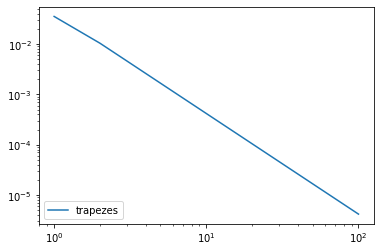

In [15]:
A=np.array([n+1 for n in range(100)])
B=np.array([abs(trapezes(fonctiontest,0,1,n+1)-np.pi/4) for n in range(100)])
plt.loglog(A,B,label="trapezes")
plt.legend(loc='lower left')

On constate donc qu'empiriquement, cette méthode est d'ordre 2.

## Méthode de Simpson

<div id="exer:integration-simpson"></div>

Si la méthode des rectangle consiste à approximer la fonction $f$ sur un intervalle par une fonction constante (polynome de degré 0), la méthode des trapèzes par une fonction affine (polynome de degré 1), la méthode de Simpson consiste à approximer la fonction $f$ sur chaque intervalle $[x_i,x_{i+1}]$ par un polynôme de degré deux. Le polynôme choisi est le polynôme d'interpolation de Lagrange de $f$ en les points $\{x_i,\frac{x_i+x_{i+1}}{2},x_{i+1}\}$, c'est-à-dire $p_i(x)=a_i x^2+b_ix+c_i$ de degré deux tel que:
$$
p_i(x_i)=f(x_i), \quad p_i(\frac{x_i+x_{i+1}}{2})=f(\frac{x_i+x_{i+1}}{2}) \quad \mbox{et} \quad p_i(x_{i+1})=f(x_{i+1})
$$

__Exercice 2 (Implémentation de la méthode de Simpson)__

__1.__
Trouver la formule qui exprime les coefficients $a_i$, $b_i$ et $c_i$ en fonction de $f(x_i)$, $f(\frac{x_i+x_{i+1}}{2})$ et $f(x_{i+1})$.

__2.__
En déduire la formule qui exprime intégrale $\int_{x_i}^{x_{i+1}} p_i(x)\,\mathrm{d} x \,.$ en fonction de $f(x_i)$, $f(\frac{x_i+x_{i+1}}{2})$ et $f(x_{i+1})$.


__3.__ L'approximation de l'intégrale $\int_a^b f(x)dx$ par la méthode de Simpson est le nombre
$$
J_n^{sim}=\sum_{i=0}^{n} \int_{x_i}^{x_{i+1}} p_i(x)dx.
$$
Déduire de __2.__ la formule qui donne $J_n^{sim} $, en ayant soin de simplifier à la main la somme qui en résulte.

Indication, le résultat est :

$$
J_n^{sim} = \frac{b-a}{3 n}\left[\frac{f(b)-f(a)}{2}+\sum_{i=0}^{n}\left(f(x_{i})+2f\left(\frac{x_{i}+x_{i+1}}{2}\right)\right)\right] \,.
$$

__4.__ Écrire une fonction `simpson(f,a,b,n)` permettant de calculer $J^{sim}_n$ avec la méthode de Simpson.



__5.__ Pour représenter la vitesse de convergence de la méthode de Simpson, on considère l'exemple de $\int_0^1 \sqrt{1-x^2}=\pi/4$. Représenter graphiquement l'erreur:
$$
e_n=|\frac \pi 4-J_n^{sim}|.
$$
avec des échelles logarithmiques pour les valeurs de cette suite et pour les valeurs de $n$.


__6.__ On souhaite déterminer empiriquement la vitesse de convergence de la méthode de Simpson à l'aide de l'approximation des moindres carrés.

Un système linéaire $Au=y$ admet toujours une solution approchée au sens des moindres carrés. Vous avez sûrement déjà vu cette notion, que nous reverrons dans les TP prochains d'optimisation. La routine `numpy.linalg.lstsq(A,y)` renvoie une telle solution approchée $y$ de $Au=y$ au sens des moindres carrés.

Rappelons en quoi correspond une approximation affine au sens des moindres carrés. On cherche à approximer une fonction $g(x)$ par une fonction affine $f(x)=ax+b$, et donc il faut déterminer les "meilleurs" coefficients $a$ et $b$. Étant donnée une collection de points $x=(x_0,...,x_{m-1})$, l'évaluation de $g$ en ces points donne le vecteur $y=(g(x_0),...,g(x_{m-1}))$. L'évaluation de $f$ en ces points est donnée par le vecteur par la multiplication matricielle
$$
\begin{pmatrix} f(x_0)\\ ...\\ f(x_{m-1})\end{pmatrix}=Au \qquad \mbox{avec} \qquad A=\begin{pmatrix} x_0 & 1\\ ... \\ x_{m-1} & 1 \end{pmatrix}.
$$
où $u=(a,b)^T$. L'approximation affine de $g$ au sens des moindres carrés est alors la fonction $x\mapsto ax+b$ où $u=(a,b)^T$ est la solution de
$$
Au=\begin{pmatrix} y_0\\...\\y_{m-1} \end{pmatrix}
$$
au sens des moindres carrés.

Utiliser l'approximation affine au sens des moindres carrés pour approximer la fonction $\log n \mapsto \log e_n$. Quel coefficient $a$ avez-vous trouvé ? En déduire empiriquement l'ordre de convergence de la méthode de Simpson.

## Intégration avec les routines de Scipy

### La fonction `scipy.integrate.quad`

Les méthodes d'intégrations précédentes et d'autres sont définies dans le module `integrate` de Scipy. Ce module permet de faire appel à ses méthodes sans les coder de nouveau, ce qui est très pratique, et permet  de traiter des cas plus compliqués: intégrales singulières, généralisées ou en plusieurs dimensions.<br>

La fonction `scipy.integrate.quad` permet de calculer une intégrale d'une variable. Nous reprenons l'exemple de $\int_0^1\frac{dx}{1+x^2}$ :

In [16]:
import scipy.integrate as sc_int
def fonctiontest3(x):
    return(1/(1+x**2))
sc_int.quad(fonctiontest3,0,1)

(0.7853981633974483, 8.71967124502158e-15)

L'algorithme utilisé repose sur la quadrature de Gauss pour le calcul d'une intégrale, plus efficace que ce que nous avons vu jusqu'alors, et que nous ne détaillerons pas ici.

On peut également intégrer entre $-\infty $ et $\infty$, et calculer par exemple $\int_{-\infty}^{\infty} \frac{1}{1+x^2}dx$ :

In [17]:
sc_int.quad(fonctiontest3,-np.inf,+np.inf) # On utilise le module numpy pour l'infini via numpy.inf

(3.141592653589793, 5.155583041103855e-10)

Les fonctions `scipy.integrate.dblquad` et `scipy.integrate.tplquad` permettent le calcul d'intégrales doubles et triples respectivement. Par exemple, pour calculer $\int_{\mathbb R^2} e^{-x^2-y^2}dxdy$:

In [18]:
def fonctiontest4(x,y):
    return(np.exp(-x**2-y**2))
sc_int.dblquad(fonctiontest4,-np.inf,np.inf,-np.inf,np.inf)

(3.141592653589777, 2.5173086244657047e-08)

### Exercice

__Exercice 3__ <br>__1.__ Définir une fonction `E(n,x)` calculant numériquement l'intégrale suivante:
$$
E_n(x) = \int_1^\infty \frac{e^{-xt}}{t^n} \mathrm{d} t \,.
$$

__2.__ Déterminer une approximation de l'intégrale double:
$$
I = \int_{0}^{\pi} \left(\int_{0}^{y} x \sin(xy) \,\mathrm{d} x \right) \mathrm{d} y \,.
$$

## Complément : Méthode de Monte-Carlo

### L'algorithme

La méthode de Monte-Carlo repose sur la définition de l'intégrale par Lebesgue, c'est une approche probabiliste. L'idée de base est que l'intégrale $\int_a^b f(x)dx$ peut être vue comme l'espérance d'une variable aléatoire. En effet, soit $X$ un nombre tiré aléatoirement, et de manière uniforme, sur $[a,b]$, c'est à dire que $X$ est une variable aléatoire réelle de densité $\frac{dx}{b-a}\mathbf{1}(a\leq x\leq b)$. Alors la variable aléatoire $f(X)$ a pour moyenne:

$$
\mathbb E (Y)= \frac{1}{b-a}\int_a^b f(x)dx.
$$
Soit maintenant $X_0,...,X_n$ une suite de variables aléatoires indépendantes, identiquemenent distribuées uniformément sur l'intervalle $[b-a]$ et $Y_n=f(X_n)$.

Par la loi des grands nombres on a la convergence de la mesure empirique pour les variables $(Y_n)_n$ :

$$
\lim_{n\to \infty} \frac{1}{n} \sum_{i=0}^{n-1} Y_n=\mathbb E(Y) \quad \mbox{presque partout},
$$
c'est-à-dire :
$$
(b-a) \lim_{n\to \infty} \frac{1}{n} \sum_{i=0}^{n-1} f(X_n)=\int_a^b f(x)dx.
$$
Ci-dessus, pour calculer $\sum_{i=0}^{n-1} f(X_n)$, il suffit de tirer $n$ fois un nombre aléatoirement dans l'interval $[a,b]$, c'est ce que nous allons faire en définissant l'approximation de l'intégrale par la méthode de Monte-Carlo par :
$$
J_n^{mc}=\frac{b-a}{n} \sum_{i=0}^{n-1} f(X_n)
$$

Si $f\in L^2([a,b])$, alors on peut meme montrer par le théorème central limite que presque surement on a 
$$
|(b-a) \frac{1}{n} \sum_{i=0}^{n-1} f(X_n)-\int_a^b f(x)dx |\lesssim \frac{1}{n^{1/2}}
$$
On en déduit que la méthode de Monte-Carlo est d'ordre $1/2$.

La fonction `montecarlo(f,a,b,n)` ci-dessous détermine une approximation $\int_a^b f(x)dx$ par la méthode de Monte-Carlo.

In [19]:
def montecarlo(f,a,b,n):
    x=0
    for i in range(n):
        x=x+f(np.random.uniform(a,b))
    x=x/n
    return(x)

In [20]:
montecarlo(fonctiontest,0,1,1000)

0.7737294681230663

### Ordre de convergence

Pour étudier empiriquement la convergence de la méthode de Monte-Carlo en fonction de $n$, on reprend l'exemple du calcul de $\int_0^1 \frac{1}{1+x^2}$. Pour un entier $k$, on calcule la moyenne des valeurs de $J_n$ obtenues par $k$ réalisations différentes, ainsi que la variance de ces realisations. On regarde alors le comportement quand $n\to \infty$.

In [21]:
def montecarloemp(f,a,b,k,n):
    J=np.array([montecarlo(f,a,b,n) for j in range(k)])
    m=np.sum(J)/k
    v=np.sum((J-m)**2)/k
    return(m,v)

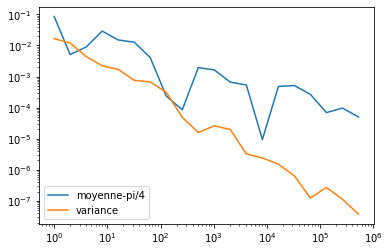

In [22]:
x=np.array([2**n for n in range(20)])
a=np.array([montecarloemp(fonctiontest,0,1,10,2**n) for n in range(20)])
y=np.array([abs(a[i,0]-np.pi/4) for i in range(20)])
z=np.array([a[i,1] for i in range(20)])
plt.loglog(x,y,label="moyenne-pi/4")
plt.loglog(x,z,label="variance")
plt.legend(loc='lower left')

On constate bien empiriquement que la convergence est d'ordre $1/2$.

### Exercice

__Exercice 4__

__1.__ Modifier la fonction `montecarlo(f,a,b,n)` précédente, pour qu'elle retourne en plus de la moyenne empirique $J_n^{mc}$ la variance empirique:

$$
V_n = \frac{(b-a)^2}{n}\sum_{i=0}^{n-1} \left(f(x_i)-\frac{J_n^{mc}}{b-a}\right)^2 \,.
$$

__2.__ Prenez un exemple de calcul d'intégrale $\int_a^b f(x)dx$ de votre choix. Tracer dans un graphique les valeurs de $V_n$ en fonction de $n$ obtenues sur une simulation. Que constatez-vous ?

Les méthodes d'intégrations précédentes et d'autres sont définies dans le module `integrate` de Scipy. Ce module permet de faire appel à ses méthodes sans les coder de nouveau, ce qui est très pratique, et permet  de traiter des cas plus compliqués: intégrales singulières, généralisées ou en plusieurs dimensions.<br>

La fonction `scipy.integrate.quad` permet de calculer une intégrale d'une variable. Nous reprenons l'exemple de $\int_0^1\frac{dx}{1+x^2}$ :

In [49]:
import scipy.integrate as sc_int
def fonctiontest3(x):
    return(1/(1+x**2))
sc_int.quad(fonctiontest3,0,1)

(0.7853981633974483, 8.71967124502158e-15)

L'algorithme utilisé repose sur la quadrature de Gauss pour le calcul d'une intégrale, plus efficace que ce que nous avons vu jusqu'alors, et que nous ne détaillerons pas ici.

On peut également intégrer entre $-\infty $ et $\infty$, et calculer par exemple $\int_{-\infty}^{\infty} \frac{1}{1+x^2}dx$ :

In [51]:
sc_int.quad(fonctiontest3,-np.inf,+np.inf) # On utilise le module numpy pour l'infini via numpy.inf

(3.141592653589793, 5.155583041103855e-10)

Les fonctions `scipy.integrate.dblquad` et `scipy.integrate.tplquad` permettent le calcul d'intégrales doubles et triples respectivement. Par exemple, pour calculer $\int_{\mathbb R^2} e^{-x^2-y^2}dxdy$:

In [53]:
def fonctiontest4(x,y):
    return(np.exp(-x**2-y**2))
sc_int.dblquad(fonctiontest4,-np.inf,np.inf,-np.inf,np.inf)

(3.141592653589777, 2.5173086244657047e-08)

### Exercice

__Exercice 4__ <br>__1.__ Définir une fonction `E(n,x)` calculant numériquement l'intégrale suivante:

$$
E_n(x) = \int_1^\infty \frac{e^{-xt}}{t^n} \mathrm{d} t \,.
$$

$$
I = \int_{0}^{\pi} \left(\int_{0}^{y} x \sin(xy) \,\mathrm{d} x \right) \mathrm{d} y \,.
$$